<a href="https://colab.research.google.com/github/Evgenius87/Data_Science_hw/blob/main/hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Частина 1
В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

завантажуємо та нормалізуємо дані

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

створюємо архітектуру нейронної мережі

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



навчання моделі

In [9]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 6s 6ms/step - loss: 0.6755 - accuracy: 0.7442 - val_loss: 0.4441 - val_accuracy: 0.8323
Epoch 2/30
750/750 [==============================] - 3s 5ms/step - loss: 0.4401 - accuracy: 0.8374 - val_loss: 0.3659 - val_accuracy: 0.8655
Epoch 3/30
750/750 [==============================] - 3s 5ms/step - loss: 0.3717 - accuracy: 0.8626 - val_loss: 0.3276 - val_accuracy: 0.8794
Epoch 4/30
750/750 [==============================] - 4s 5ms/step - loss: 0.3377 - accuracy: 0.8762 - val_loss: 0.2956 - val_accuracy: 0.8873
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3114 - accuracy: 0.8842 - val_loss: 0.2863 - val_accuracy: 0.8915
Epoch 6/30
750/750 [==============================] - 4s 5ms/step - loss: 0.2906 - accuracy: 0.8934 - val_loss: 0.2702 - val_accuracy: 0.9017
Epoch 7/30
750/750 [==============================] - 3s 5ms/step - loss: 0.2791 - accuracy: 0.8965 - val_loss: 0.2599 - val_accuracy: 0.9048
Epoch 

Відображення графіків навчання

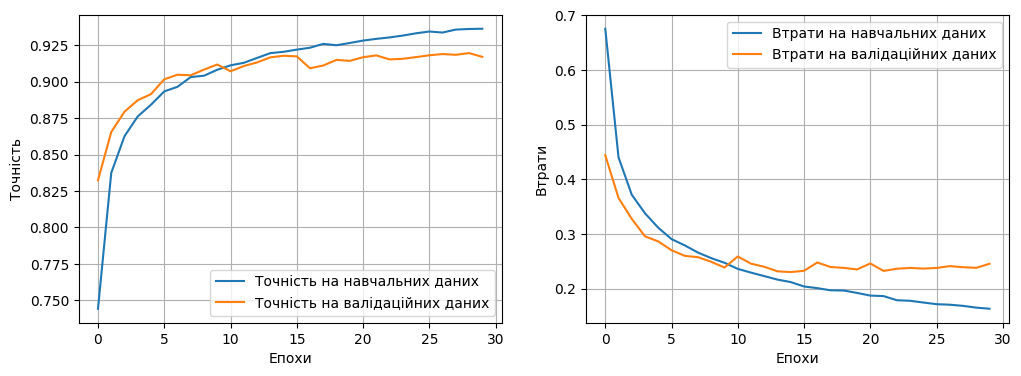

313/313 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9101
Точність на тестовому наборі даних: 91.01%


In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)

plt.show()

# Оцінка точності на тестовому наборі даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Точність на тестовому наборі даних: {test_acc * 100:.2f}%")

В результаті використання згорткової нейронної мережі вдалось досягти точності 0.93. В попередньому завдання для повнозєязної нейронної мережі вдалось досягти точності лише 0.91ю
Висновок:
Згорткові нейронні мережі краще класифікують зображення ніж повнозєязні нейронні мережі.